In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Palladio'
raceDate = '2/12/2023'
surface = 'Tarmac'
competition = 'Cup'

link = 'https://www.ewrc-results.com/results/86269-rally-paladio-2023/?s='
startat, no_ss=444371, int(6)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

C:\Users\ilias\AppData\Local\Temp\ipykernel_9324\638908188.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')


In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#1,Koukeas Efstat,C1,2:04.47,-,121.5,1,Palladio,2/12/2023,Tarmac,Cup,1
1,2,#3,Avgeropoulos C,C4 F2,2:05.13,+0.66 + 0.66,120.8 0.16,1,Palladio,2/12/2023,Tarmac,Cup,2
2,3,#2,Zakheos Nikola,C3 F2,2:10.62,+6.15 + 5.49,115.8 1.46,1,Palladio,2/12/2023,Tarmac,Cup,3
3,3,#6,Karathanassis,C5 F2,2:10.62,+6.15 + 0.00,115.8 1.46,1,Palladio,2/12/2023,Tarmac,Cup,4
4,3,#7,Kandiliotis V.,C3 F2,2:10.62,+6.15 + 0.00,115.8 1.46,1,Palladio,2/12/2023,Tarmac,Cup,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21,#33,Papazoglou L.,4 2000+,4:50.16,+53.21 + 2.54,100.2 6.59,6,Palladio,2/12/2023,Tarmac,Cup,21
21,22,#36,Gerovassilis A,4 2000,4:52.93,+55.98 + 2.77,99.3 6.93,6,Palladio,2/12/2023,Tarmac,Cup,22
22,23,#18,Kondilis Panag,C5 F2,5:13.15,+1:16.20 + 20.22,92.9 9.43,6,Palladio,2/12/2023,Tarmac,Cup,23
23,24,#28,Pakkos F. - P,C3 F2,5:13.32,+1:16.37 + 0.17,92.8 9.45,6,Palladio,2/12/2023,Tarmac,Cup,24


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv(str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Koukeas Efstat,C1,1,Palladio,2/12/2023,Tarmac,Cup,1,124.47
1,Avgeropoulos C,C4 F2,1,Palladio,2/12/2023,Tarmac,Cup,2,125.13
2,Zakheos Nikola,C3 F2,1,Palladio,2/12/2023,Tarmac,Cup,3,130.62
3,Karathanassis,C5 F2,1,Palladio,2/12/2023,Tarmac,Cup,4,130.62
4,Kandiliotis V.,C3 F2,1,Palladio,2/12/2023,Tarmac,Cup,5,130.62
...,...,...,...,...,...,...,...,...,...
20,Papazoglou L.,4 2000+,6,Palladio,2/12/2023,Tarmac,Cup,21,290.16
21,Gerovassilis A,4 2000,6,Palladio,2/12/2023,Tarmac,Cup,22,292.93
22,Kondilis Panag,C5 F2,6,Palladio,2/12/2023,Tarmac,Cup,23,313.15
23,Pakkos F. - P,C3 F2,6,Palladio,2/12/2023,Tarmac,Cup,24,313.32


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race     ss          
Palladio 1     124.47
         2     322.16
         3     237.90
         4     122.62
         5     324.18
         6     236.95

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Koukeas Efstat,C1,1,Palladio,2/12/2023,Tarmac,Cup,1,124.47,124.47,0.00,0.000000,01
1,Avgeropoulos C,C4 F2,1,Palladio,2/12/2023,Tarmac,Cup,2,125.13,124.47,0.66,0.530248,01
2,Zakheos Nikola,C3 F2,1,Palladio,2/12/2023,Tarmac,Cup,3,130.62,124.47,6.15,4.940950,01
3,Karathanassis,C5 F2,1,Palladio,2/12/2023,Tarmac,Cup,4,130.62,124.47,6.15,4.940950,01
4,Kandiliotis V.,C3 F2,1,Palladio,2/12/2023,Tarmac,Cup,5,130.62,124.47,6.15,4.940950,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Papazoglou L.,4 2000+,6,Palladio,2/12/2023,Tarmac,Cup,21,290.16,236.95,53.21,22.456214,06
162,Gerovassilis A,4 2000,6,Palladio,2/12/2023,Tarmac,Cup,22,292.93,236.95,55.98,23.625237,06
163,Kondilis Panag,C5 F2,6,Palladio,2/12/2023,Tarmac,Cup,23,313.15,236.95,76.20,32.158683,06
164,Pakkos F. - P,C3 F2,6,Palladio,2/12/2023,Tarmac,Cup,24,313.32,236.95,76.37,32.230428,06


In [17]:
#ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6 = ss_times_F
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Koukeas Efstat,C1,1,Palladio,2/12/2023,Tarmac,Cup,1,124.47,124.47,0.00,0.000000,01
1,Avgeropoulos C,C4 F2,1,Palladio,2/12/2023,Tarmac,Cup,2,125.13,124.47,0.66,0.530248,01
2,Zakheos Nikola,C3 F2,1,Palladio,2/12/2023,Tarmac,Cup,3,130.62,124.47,6.15,4.940950,01
3,Karathanassis,C5 F2,1,Palladio,2/12/2023,Tarmac,Cup,4,130.62,124.47,6.15,4.940950,01
4,Kandiliotis V.,C3 F2,1,Palladio,2/12/2023,Tarmac,Cup,5,130.62,124.47,6.15,4.940950,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Papazoglou L.,4 2000+,6,Palladio,2/12/2023,Tarmac,Cup,21,290.16,236.95,53.21,22.456214,06
162,Gerovassilis A,4 2000,6,Palladio,2/12/2023,Tarmac,Cup,22,292.93,236.95,55.98,23.625237,06
163,Kondilis Panag,C5 F2,6,Palladio,2/12/2023,Tarmac,Cup,23,313.15,236.95,76.20,32.158683,06
164,Pakkos F. - P,C3 F2,6,Palladio,2/12/2023,Tarmac,Cup,24,313.32,236.95,76.37,32.230428,06


In [18]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Palladio                                      
SS.                  01      02      03     04      05     06
Crew                                                         
Avgeropoulos C     0.66   21.05    4.04   2.00    0.00   0.00
Benoukas Marin     6.15   43.40   40.20  21.94   31.17  24.07
Chrissafi Mari     6.15  174.84  106.52  66.84  137.00  89.63
Dekas Giorgos      6.15     NaN     NaN    NaN     NaN    NaN
Dekas K.  - Ba     6.15     NaN     NaN    NaN     NaN    NaN
Gavriilidis Gi     6.15   61.68   55.42  27.21   62.97  48.69
Gerovassilis A     6.15   59.13   45.56  23.22   52.64  55.98
Gyzis Ioannis      6.15     NaN     NaN    NaN     NaN    NaN
Halivelakis A.     6.15   65.74   49.95  24.53   57.66  50.67
Kalaitzian I.      6.15   49.07   40.90  14.23   34.06  25.36
Kandiliotis V.     6.15   39.08   26.85  12.64   32.79  26.67
Kapralos D.  -     6.15   28.05   42.49   5.87   11.71  17.85
Karathanassis      6.15   29.53   25.10  12.25   16.72  18.60
Katsikas Ioann     6.15   35.03   29.57  15.07   29.23  34.68
Kondilis Panag     6.15   42.63   32.20  20.50   40.58  76.20
Koukeas Efstat     0.00   13.93   15.11   0.00   41.63    NaN
Kouniakis K.       6.15   68.64   65.76    NaN     NaN    NaN
Margaronis A.      6.15   35.38   23.27  38.95   29.07  25.29
Melas D.  - Va     6.15   60.50   49.36  21.50   66.84  49.63
Moschos A.  -      6.15    0.00    0.00   0.52   29.30  12.48
Nomikos Andrea    12.13   32.06   22.48   8.96   18.76  11.61
Pakkos F.  - P     6.15  101.77   75.54  40.82   95.54  76.37
Papaloukas Nik     6.15   42.64   32.83  17.42     NaN    NaN
Papazoglou L.      6.15   66.77   54.41  25.18   47.13  53.21
Rekkas Panange     6.15   35.61   25.89  12.33   25.56  24.21
Rekkas Viktora     6.15   48.11   25.45  15.12   28.73  22.29
Stafilopatis M     6.15    6.72    5.92   7.52    4.76  12.68
Stamatakis S.      6.15   48.07   28.19  12.59   32.86  29.28
Tiros Nikos  -     6.15   42.13   27.24  11.38   30.97  26.70
Tsalamatas Ioa     6.15   63.23   48.62  18.50   50.88  41.19
Zakheos Nikola     6.15     NaN     NaN    NaN     NaN    NaN
Zois Dimitris      6.15   42.82   36.81  18.45   50.52  32.98

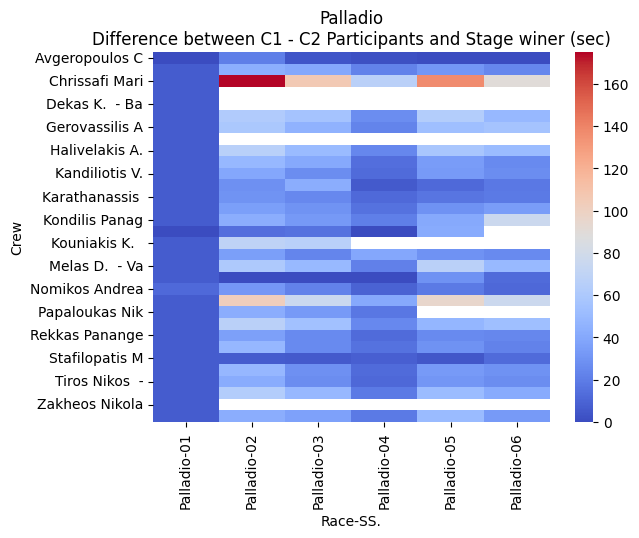

In [19]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDifference between C1 - C2 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

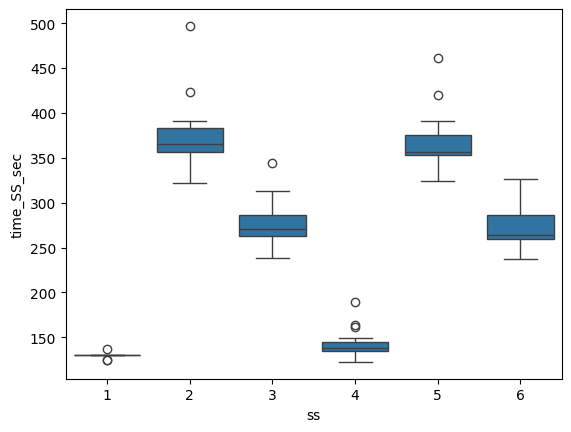

In [20]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

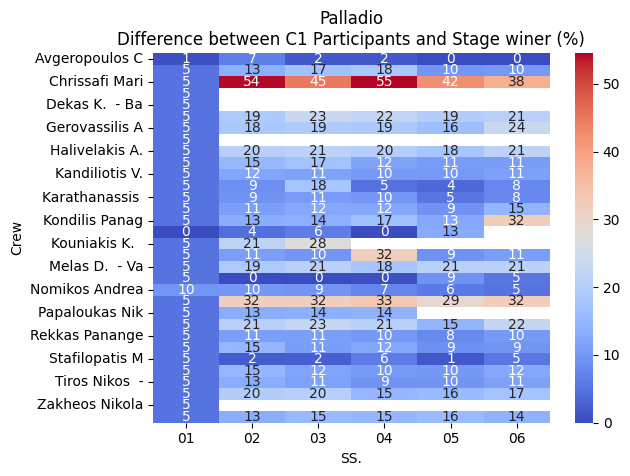

In [21]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDifference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")